# Exercise - Implementing Edge Detection

1. Convolve $H_x$ and $H_y$ with grayscale image to obtain $G_x$ and $G_y$

2. Take $G = \sqrt{G_x^2 + G_y^2}$ (This is the Edge Detected output)

$$
H_x = 
\begin{pmatrix}
    1 && 0 && -1 \\ 
    2 && 0 && -2 \\ 
    1 && 0 && -1
\end{pmatrix}
,
H_y = 
\begin{pmatrix}
    1 && 2 && 1 \\ 
    0 && 0 && 0 \\ 
    -1 && -2 && -1
\end{pmatrix}
$$

$$
G_x = H_x \cdot A
$$

$$
G_y = H_y \cdot A
$$

> $A$ is the image

$$
G = \sqrt{G_x^2 + G_y^2}
$$

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [4]:
import requests

LENA_URL = 'https://upload.wikimedia.org/wikipedia/en/thumb/7/7d/Lenna_%28test_image%29.png/220px-Lenna_%28test_image%29.png'
LENA_PATH = './data/raw/lena.png'

with open(LENA_PATH, 'wb') as f:
    f.write(requests.get(LENA_URL).content)

lena = Image.open(LENA_PATH)

type(lena)

PIL.PngImagePlugin.PngImageFile

In [19]:
H_x = np.array([[1, 0, -1],
                [2, 0, -2],
                [1, 0, -1]])

H_x.shape

(3, 3)

In [20]:
H_y = np.array([[1, 2, 1],
                [0, 0, 0],
                [-1, -2, 1]])

H_y.shape

(3, 3)

(220, 220)


(-0.5, 219.5, 219.5, -0.5)

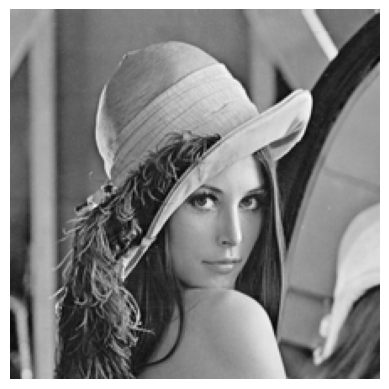

In [21]:
lena_gray = np.mean(lena, axis=2)

print(lena_gray.shape)
plt.imshow(lena_gray, cmap='grey')
plt.axis('off')

In [22]:
from scipy.signal import convolve2d

G_x = convolve2d(H_x, lena_gray)

G_y = convolve2d(H_y, lena_gray)

print('G_x', G_x.shape)
print('G_y', G_y.shape)

G_x (222, 222)
G_y (222, 222)


In [23]:
G = np.sqrt(G_x**2 + G_y**2)

G.shape

(222, 222)

(-0.5, 221.5, 221.5, -0.5)

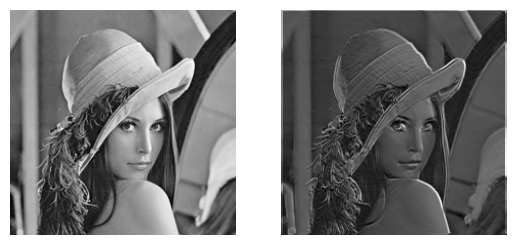

In [26]:
plt.subplot(1, 2, 1)
plt.imshow(lena_gray, cmap='grey')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(G, cmap='grey')
plt.axis('off')